
## Task 2 CNN
### Question 3 
First we import all the necessary libraries 
- idx2numpy - to convert dataset from idx to numpy array form 
- numpy - for handling data 
- cv2 - for resizing image 
- scikit-learn - for train test split and measuring accuracy 
- tensorflow - for CNN  
- os - for getting the image path

In [ ]:
import idx2numpy
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import to_categorical
from matplotlib import pyplot as plt
import cv2
import os
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv1D, MaxPooling1D

Import the MNIST standard test split that we downloaded in question 2. The data is imported using idx2numpy just like in earlier question. The testing data can is stored in test_images and test_labels and this will be used for testing the model later.

In [ ]:
test_images = idx2numpy.convert_from_file("/Users/vaibhavmalhotra/Desktop/MIDAS 2/t10k-images-idx3-ubyte")
test_labels = idx2numpy.convert_from_file("/Users/vaibhavmalhotra/Desktop/MIDAS 2/t10k-labels-idx1-ubyte")

Now, we import the pretrained model from Question 1. Then, we display its summary to ensure that we have imported the correct model. 

In [ ]:
model = load_model("/Users/vaibhavmalhotra/Desktop/MIDAS 2/Q1_model")
model.summary()

In thi block of code, I imported the training images and labels and resized them. I also resized testing images to the required resolution(50 x 50).

In [ ]:
dim = 50
files = os.listdir('mnistTask')
files.sort()
files = files[1:]
X_train =[]
y_train = []
for folder in files:
    try:
        imgs = os.listdir(f'mnistTask/{folder}')
        imgs.sort()
        for path in imgs:
            img = cv2.imread(f"mnistTask/{folder}/{path}", cv2.IMREAD_GRAYSCALE)
            img = cv2.resize(img, (dim, dim))
            X_train.append(img)
            y_train.append(folder)
    except:
        print("Couldnt import")
       

X_test = []
for img in test_images:
    img_resize = cv2.resize(img, (dim, dim))
    X_test.append(img_resize)

Now, X_train and X_test are lists and we need to convert them into numpy arrays so that we can apply the ML model on them. This is done in this block of code.

After that, this block also performs one-hot encoding and converts labels, both testing and training to the required form, so that training and testing can be done on them.

In [ ]:
X_train = np.stack(X_train)
X_test = np.stack(X_test)
y_train = to_categorical(y_train, num_classes=62, dtype='int64')
y_test = to_categorical(test_labels, num_classes=62, dtype='int64')

Now, we train the pre-trained model from Q1 on the new dataset. I used validation data as testing data as now we won't need to perform testing separately. We will be able to see results on testing data being tested at every epoch.

I first trained this model for 100 epochs, but was able to achieve only 10% accuracy, so trained it again for 500 epochs to ensure we have passed convergence and to make sure we can analyse the results easily. Even after 500 epochs we were able to acieve only 10.08% accuracy for training and 8.92% accuracy for testing.

Then we save the model.

In [ ]:
hist = model.fit(X_train, y_train,  epochs = 500, validation_data = (X_test, y_test))
model.save(f"Q3_500_epochs_pretrained.h5")

Now, we plot accuracy on the graph so that we can easily visualize the results. 

In [ ]:
plt.plot(hist.history['accuracy'])
# plt.plot(hist1.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
# plt.legend(['Pretrained', 'Random'], loc='upper left')
plt.show()

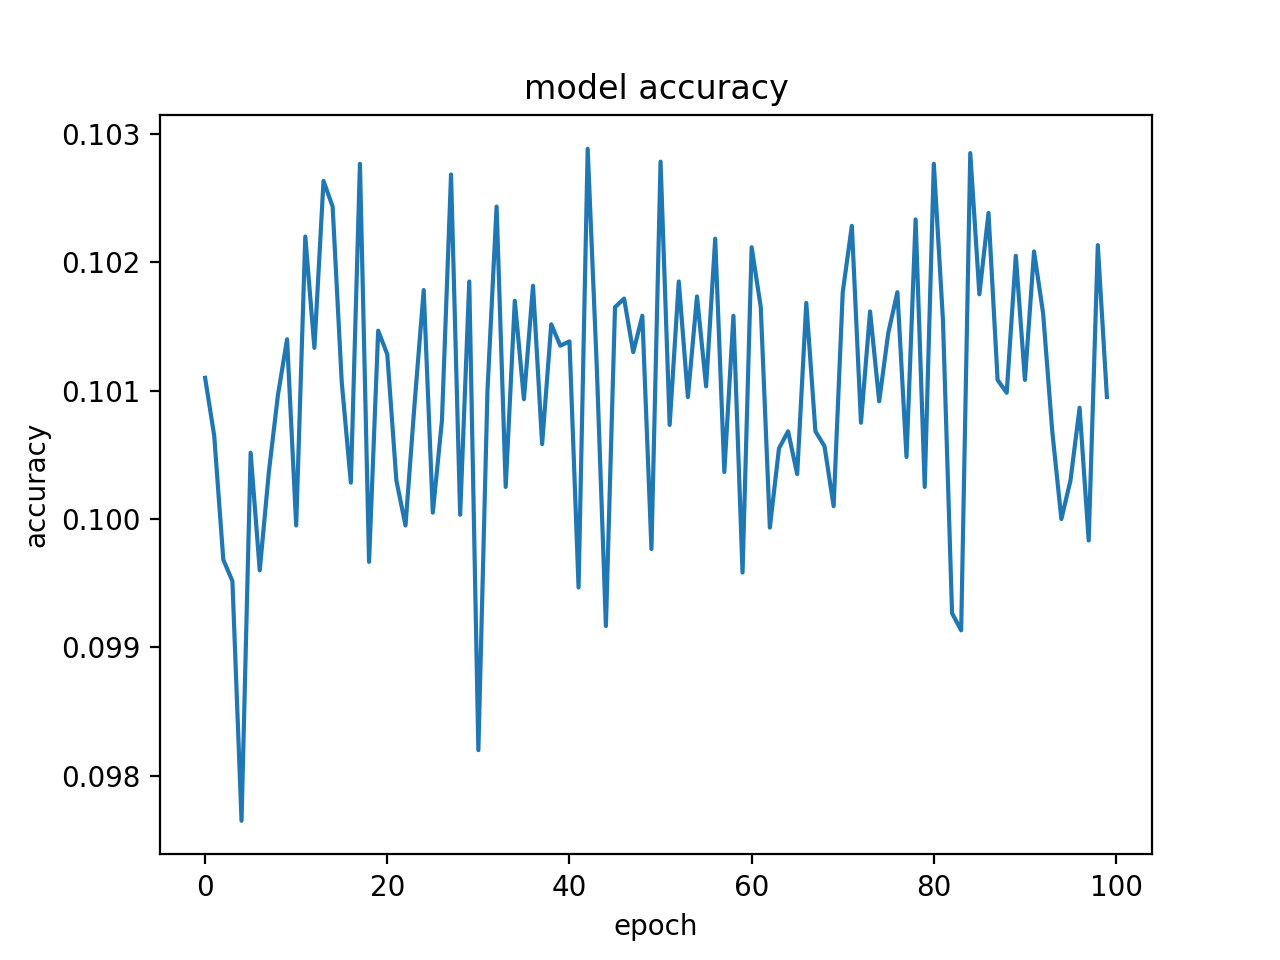

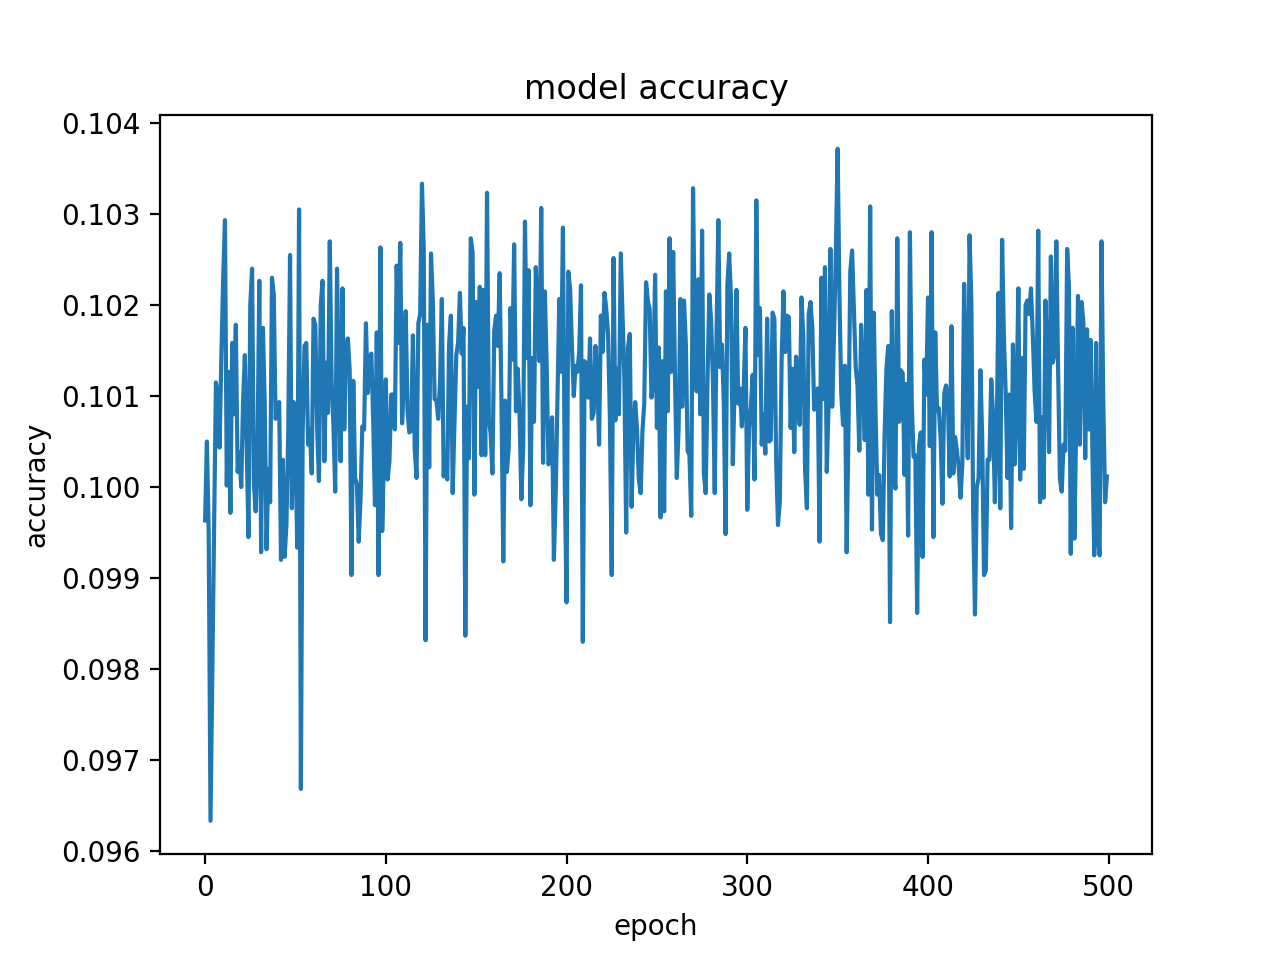

Here, we define the model from Part I, so that it is initialized with random variables. Then the model is compiled.
This model is exactly same as the one used in Part I, and above.

In [ ]:
model1 = Sequential()
model1.add(Conv1D(32,kernel_size = (5), padding ='valid',activation = 'relu', input_shape = (dim, dim)))
model1.add(MaxPooling1D(pool_size = (2)))

model1.add(Conv1D(64,kernel_size = (5), padding ='same',activation = 'relu'))
model1.add(MaxPooling1D(pool_size = (2)))

model1.add(Conv1D(64,kernel_size = (3), padding ='same',activation = 'relu'))
model1.add(MaxPooling1D(pool_size = (2)))

model1.add(Dropout(0.05))

model1.add(Flatten())

model1.add(Dense(128, activation='relu'))

model1.add(Dropout(0.1))

model1.add(Dense(62, activation = 'softmax'))
opt = tf.keras.optimizers.Adam(learning_rate=0.005)
model1.compile(loss = 'categorical_crossentropy', optimizer = opt, metrics = ['accuracy'])

Now, we train the randomly initialized model. This model is also trained for 500 epochs.

This model reaches a training accuracy of 10.28% and testing accuracy of 8% just like the earlier one.

In [ ]:
hist1 = model1.fit(X_train, y_train,  epochs = 500, validation_data = (X_test, y_test))
model1.save("Q2_500_epochs_random.h5")

Now, I plotted the graph for 100 and 500 epochs for the randomly initialized model as well.

In [ ]:
plt.plot(hist1.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

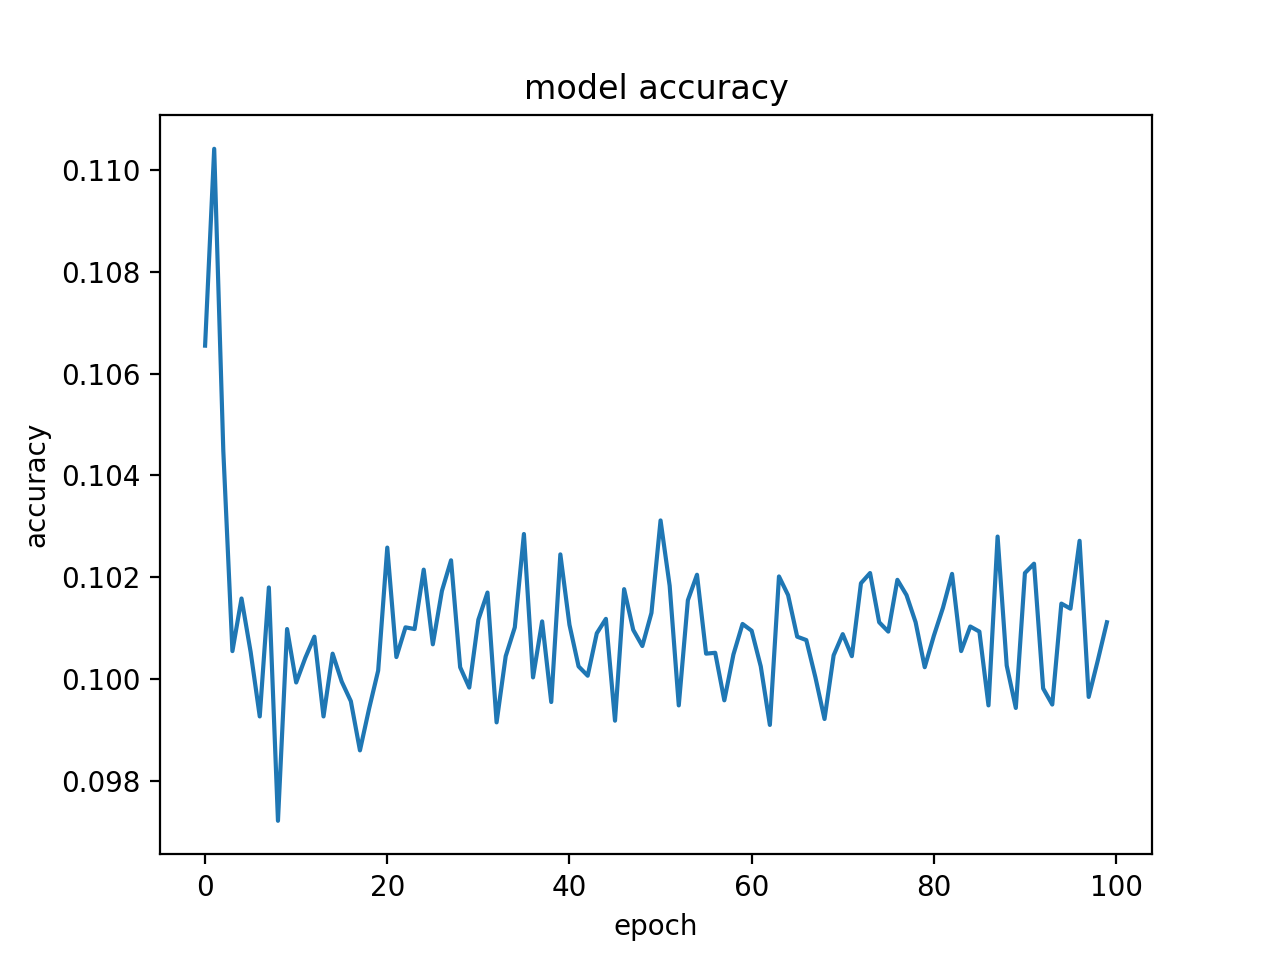

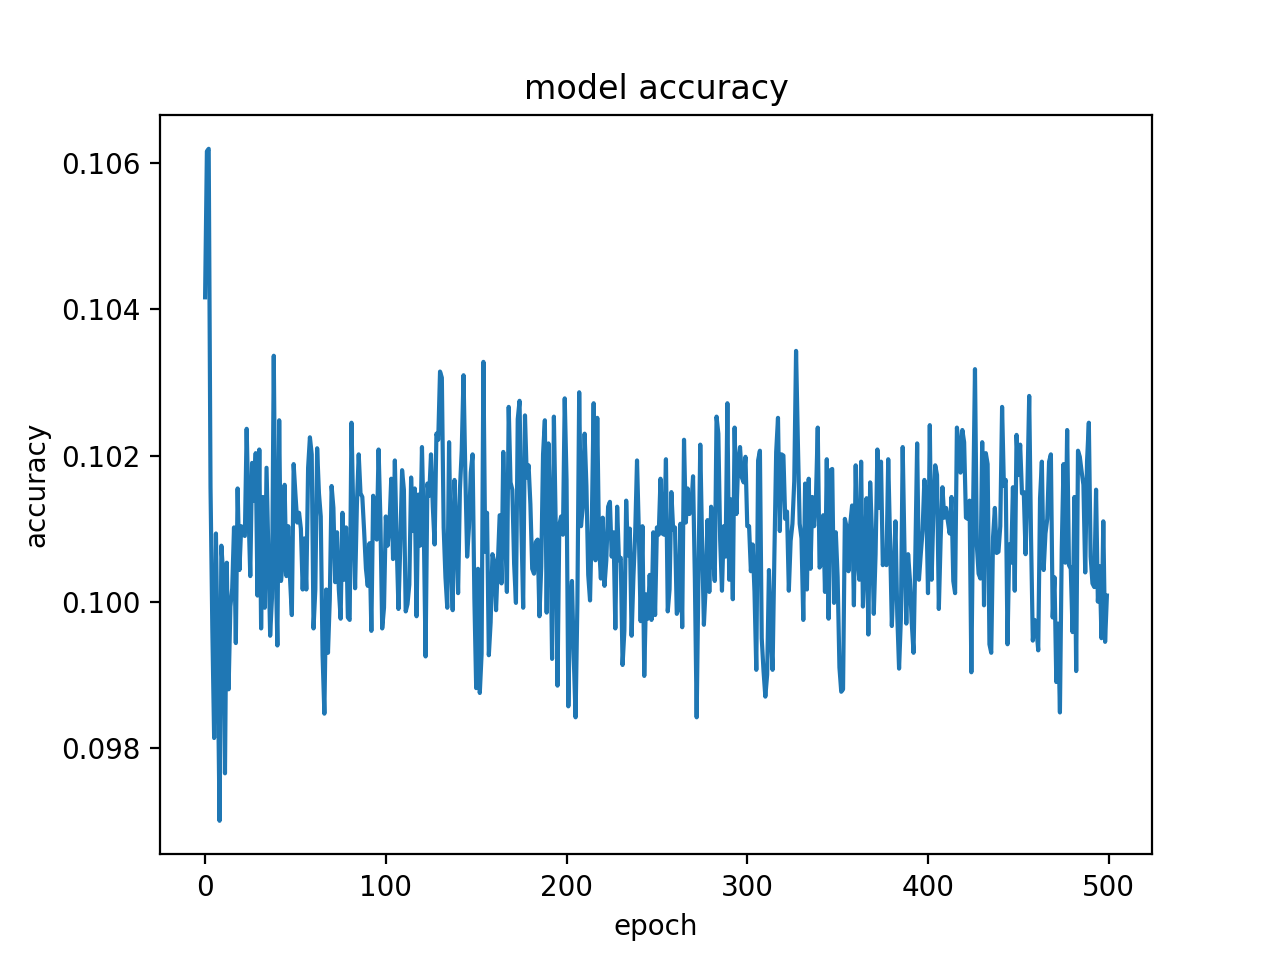

Now, we plot both accuracy models on same graph to get a better picture.

In [ ]:
plt.plot(hist.history['accuracy'])
plt.plot(hist1.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Pretrained', 'Random'], loc='upper left')
plt.show()

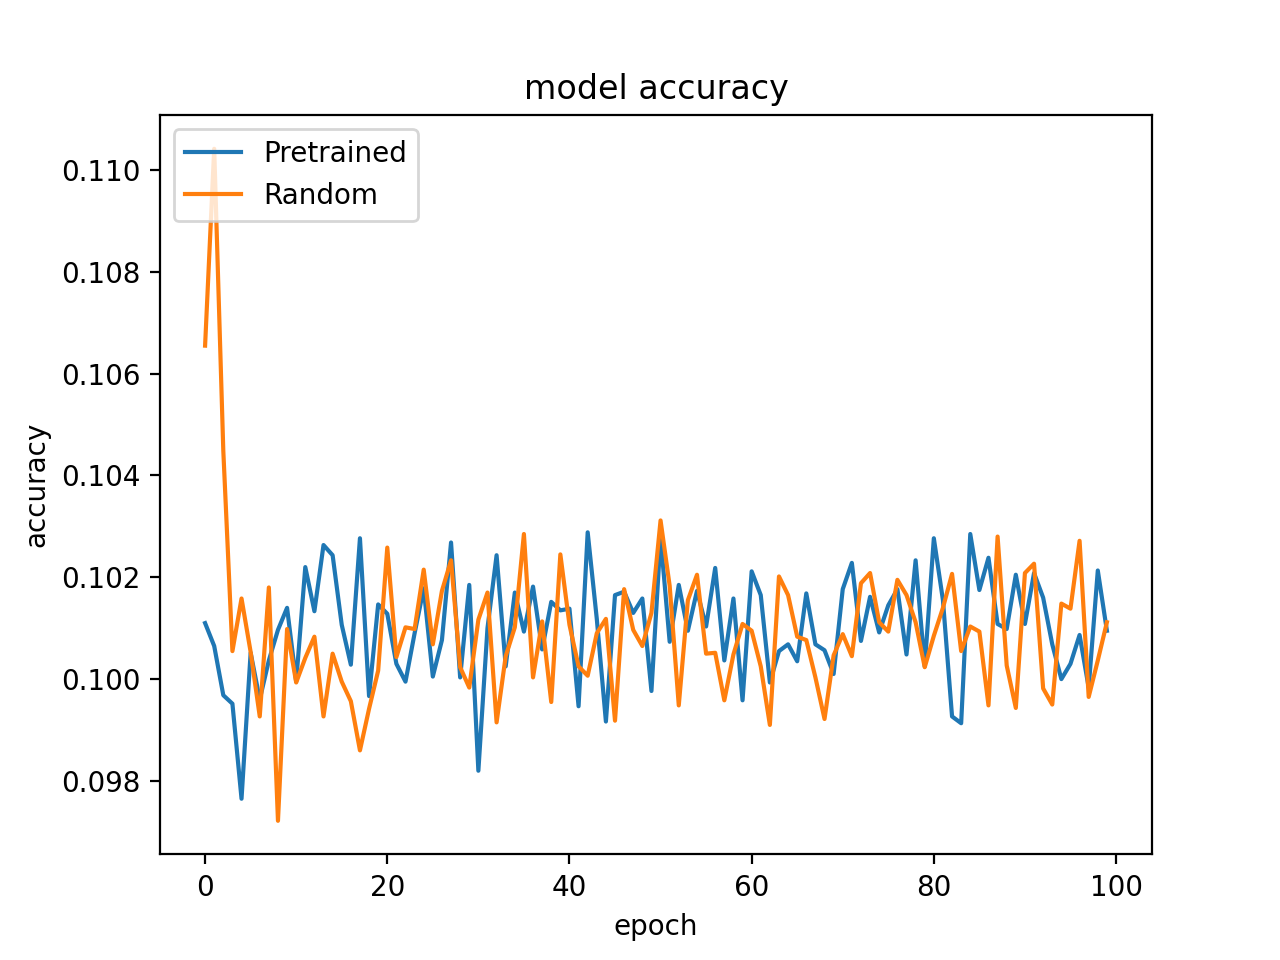

Now, for 500 epochs.

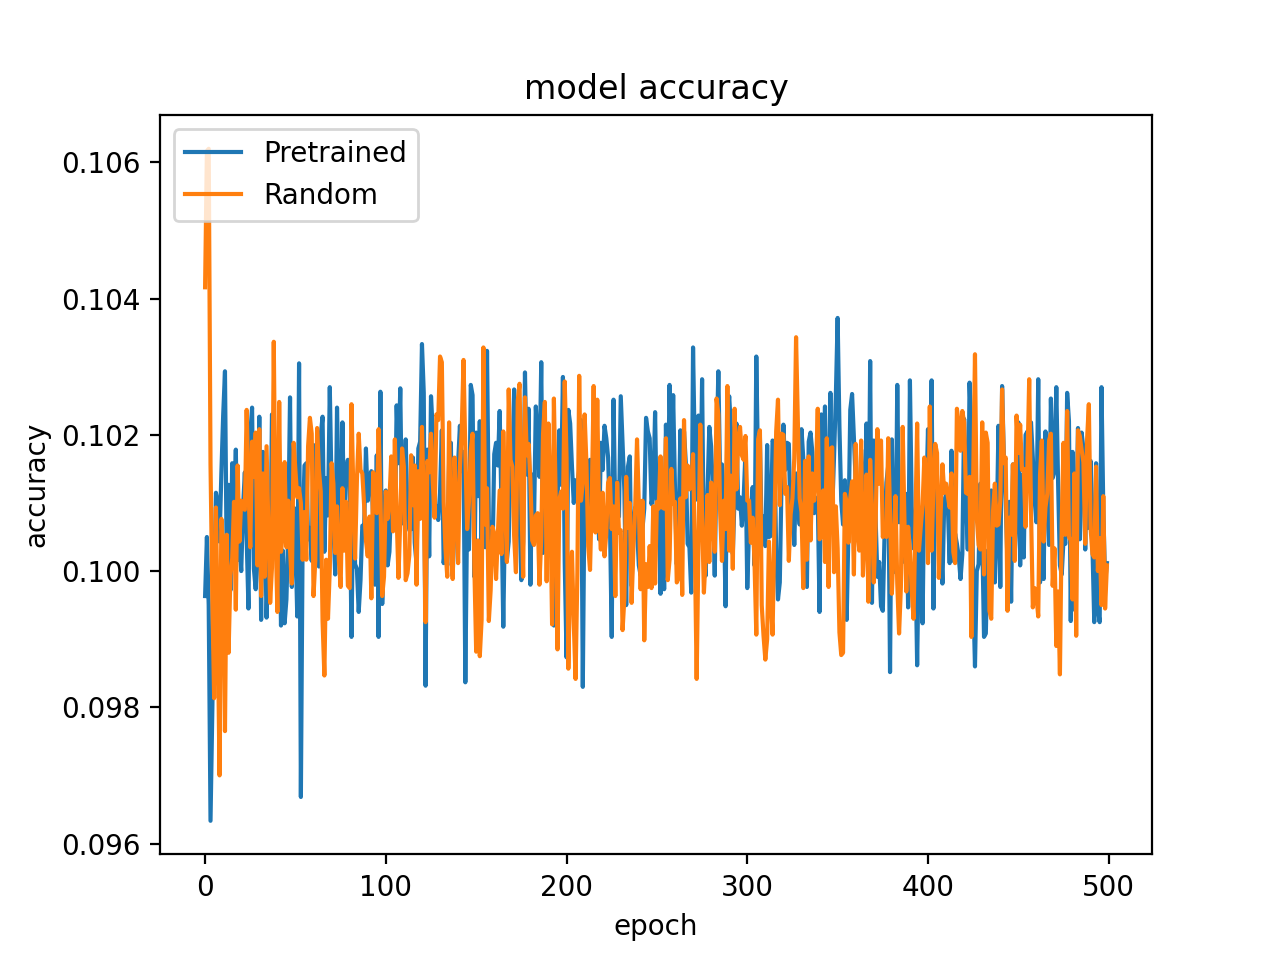

#Analysis
This dataset is different from the one used in Question 1 and 2 as they comprised of data in which labels contained their images, whereas this contains images of every digit but itself. For example, in earlier data, the number 0 would contain all the images of zero, while in this data, zero would contain images of all numbers 1-9 except 0.

So, essentially we are inversely training the model. The number of times the image is not classified as its true digit would be the accurate prediction. The accuracy received in both models is 10% for training and 8% for testing, which is expected given the type of data being trained. This data has no specific pattern that can be learned. If, say a number is not classified as its true digit, then it can be in any of the other categories. So it's a totally chaotic dataset and hence we get 10% accuracy as there are 10 classes and this is basically probabilistic, the model gets right 1/10th of the time. That is why both models have 10% accuracy.

Now, we can see that both models reach convergence pretty quickly, just around the 5th epoch. This is because first when the model starts learning in the case of randomly initialized model it has random values for all neurons and that is around 10% probabilistically and then it tries to learn the pattern but there is no pattern to learn, so accuracy does not increase, it just oscillates around 10%. 

In the case of the pre-trained model, the model has to first unlearn all the convolutions and features it has learned. But that just takes one epoch, as randomness can be achieved easily, then just like the randomly initialized model, it tries to learn a pattern but because of no pattern being present, its accuracy also oscillates around 10%.

